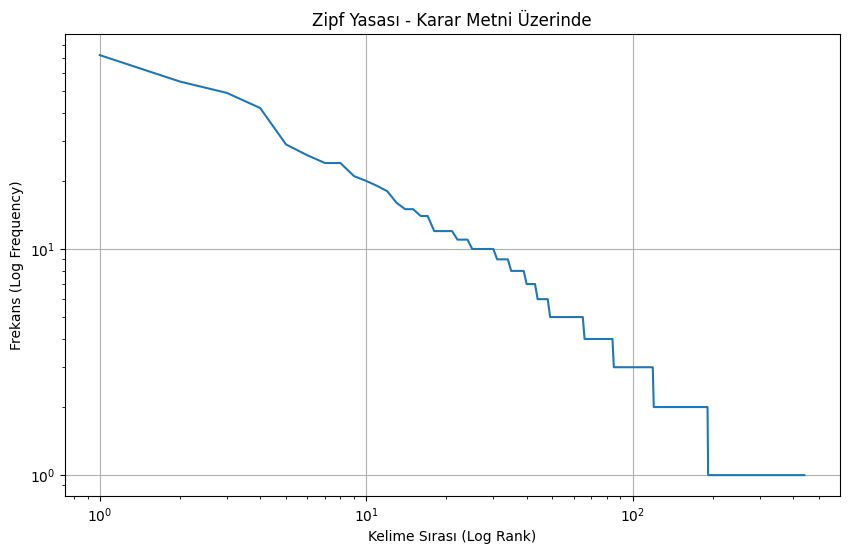

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# 1. Metni oku
with open("karar_metni_2025-05-03_16-17-56.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 2. Temizleme ve kelimelere ayırma
text = text.lower()  # Küçük harfe çevir
text = re.sub(r"[^\w\s]", "", text)  # Noktalama işaretlerini kaldır
words = text.split()

# 3. Frekans sayımı
word_counts = Counter(words)

# 4. Sıralama (rank)
frequencies = sorted(word_counts.values(), reverse=True)

# 5. Zipf grafiği çizimi
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(frequencies) + 1), frequencies)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Kelime Sırası (Log Rank)')
plt.ylabel('Frekans (Log Frequency)')
plt.title("Zipf Yasası - Karar Metni Üzerinde")
plt.grid(True)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


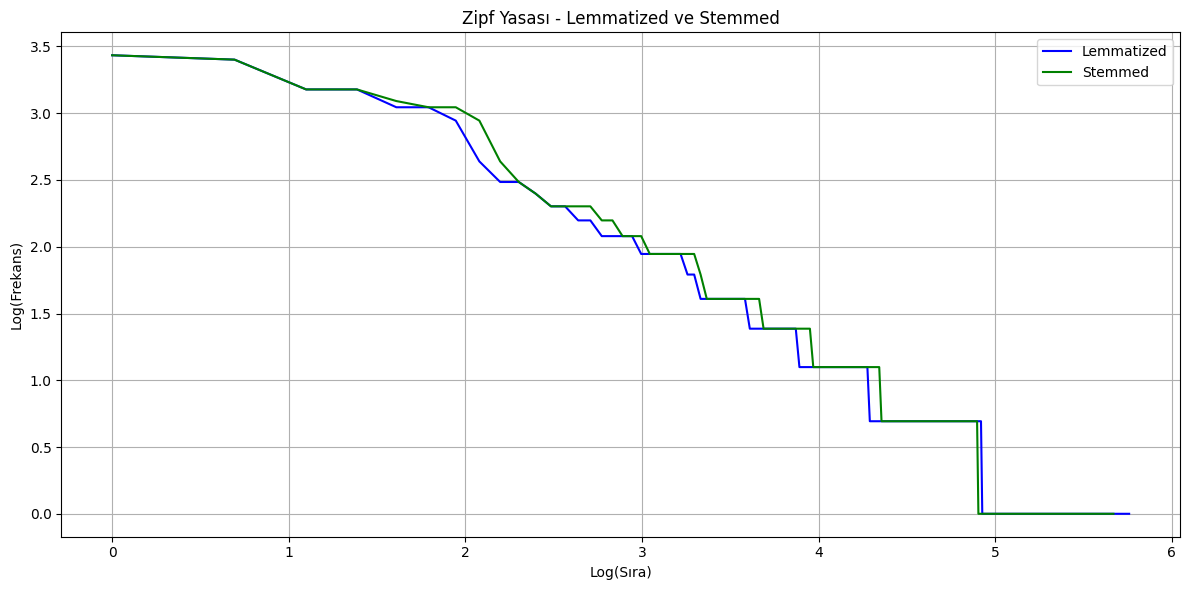

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Dosyayı oku
with open("karar_metni_2025-05-03_16-17-56.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Cümlelere ayır
sentences = sent_tokenize(text)

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return lemmatized_tokens, stemmed_tokens

tokenized_corpus_lemmatized = []
tokenized_corpus_stemmed = []

for sentence in sentences:
    lem, stem = preprocess_sentence(sentence)
    tokenized_corpus_lemmatized.append(lem)
    tokenized_corpus_stemmed.append(stem)

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Lemmatize edilmiş kelimeler
all_lemmatized_words = [word for sentence in tokenized_corpus_lemmatized for word in sentence]
lemm_freq = Counter(all_lemmatized_words)
lemm_sorted = sorted(lemm_freq.values(), reverse=True)

# Stem yapılmış kelimeler
all_stemmed_words = [word for sentence in tokenized_corpus_stemmed for word in sentence]
stem_freq = Counter(all_stemmed_words)
stem_sorted = sorted(stem_freq.values(), reverse=True)

# Grafik
plt.figure(figsize=(12, 6))
plt.plot(np.log(range(1, len(lemm_sorted)+1)), np.log(lemm_sorted), label='Lemmatized', color='blue')
plt.plot(np.log(range(1, len(stem_sorted)+1)), np.log(stem_sorted), label='Stemmed', color='green')
plt.title("Zipf Yasası - Lemmatized ve Stemmed")
plt.xlabel("Log(Sıra)")
plt.ylabel("Log(Frekans)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


